In [59]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
chart_df = pd.read_pickle('./filleddataframe1.pkl')
chart_df = pd.concat([chart_df,pd.read_pickle('./filleddataframe2.pkl')],axis=0)
gdp_df = pd.read_csv('GDP.csv')


In [60]:
chart_df.columns

Index(['chart_position', 'chart_date', 'song', 'performer', 'song_id',
       'instance', 'time_on_chart', 'consecutive_weeks', 'previous_week',
       'peak_position', 'worst_position', 'chart_debut', 'chart_url',
       'lyrics'],
      dtype='object')

In [61]:

chart_df['sentiment'] = np.linspace(0,len(chart_df)-1,len(chart_df)).astype('int16')

In [62]:
gdp_df['DATE'] = pd.to_datetime(gdp_df.DATE)

In [63]:
df = pd.concat([chart_df,gdp_df],axis=1)
df.chart_date.fillna(df.DATE,inplace=True)

In [64]:
df.sort_values('chart_date',inplace=True)
df.set_index('chart_date',inplace=True)
df['GDP-interp'] = df.GDP.interpolate(method='time')

In [65]:
df

,chart_position,song,performer,song_id,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,chart_debut,chart_url,lyrics,sentiment,DATE,GDP,GDP-interp
chart_date,,,,,,,,,,,,,,,,,
1947-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1947-01-01,14213.0,14213.0
1947-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1947-04-01,14111.0,14111.0
1947-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1947-07-01,14018.0,14018.0
1947-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1947-10-01,14171.0,14171.0
1948-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1948-01-01,14326.0,14326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2021-04-01,58864.0,58864.0
2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2021-10-01,60154.0,60154.0
2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2022-01-01,59877.0,59877.0


In [43]:
df= df.loc[df.chart_position.notnull()]

In [57]:
gdp_df.set_index('DATE',inplace=True)

<AxesSubplot:xlabel='DATE'>

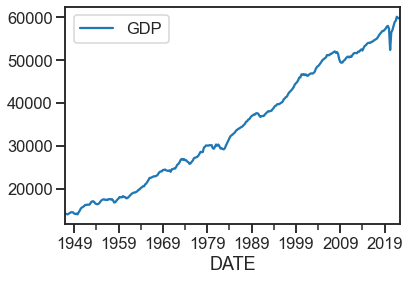

In [58]:
gdp_df.plot()

In [54]:
maxim = df['GDP-interp'].max()
df.loc[df['GDP-interp']==maxim]

,chart_position,song,performer,song_id,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,chart_debut,chart_url,lyrics,sentiment,GDP-interp,date_gdp
chart_date,,,,,,,,,,,,,,,,
1961-10-14,83.0,Rockin'-Bicycle,Fats-Domino,Rockin' BicycleFats Domino,1.0,1.0,0.0,0.0,83.0,83.0,1961-10-14,https://www.billboard.com/charts/hot-100/1961-...,Ain't got a Cadillac or big old De Ville\nI'm ...,2407.0,59202.0,1961-10-14
1961-10-14,76.0,I Wanna Thank You,Bobby Rydell,I Wanna Thank YouBobby Rydell,1.0,1.0,0.0,0.0,76.0,76.0,1961-10-14,https://www.billboard.com/charts/hot-100/1961-...,Artist: Bobby Rydell\nBuy Bobby Rydell's CD\nI...,1695.0,59202.0,1961-10-14
1961-10-14,99.0,Gypsy Woman,The Impressions,Gypsy WomanThe Impressions,1.0,1.0,0.0,0.0,99.0,99.0,1961-10-14,https://www.billboard.com/charts/hot-100/1961-...,\nFrom nowhere through a caravan\nAround the c...,1696.0,59202.0,1961-10-14
1961-10-14,81.0,"God,-Country-And-My-Baby",Johnny-Burnette,"God, Country And My BabyJohnny Burnette",1.0,1.0,0.0,0.0,81.0,81.0,1961-10-14,https://www.billboard.com/charts/hot-100/1961-...,"Johnny Burnette\nMiscellaneous\nGod, Country A...",2412.0,59202.0,1961-10-14
1961-10-14,97.0,For-Me-And-My-Gal,Freddy-Cannon,For Me And My GalFreddy Cannon,1.0,1.0,0.0,0.0,97.0,97.0,1961-10-14,https://www.billboard.com/charts/hot-100/1961-...,The bells are ringing\nFor me and my gal\nThe ...,2411.0,59202.0,1961-10-14
1961-10-14,78.0,I'll-Be-Seeing-You,Frank-Sinatra,I'll Be Seeing YouFrank Sinatra,1.0,1.0,0.0,0.0,78.0,78.0,1961-10-14,https://www.billboard.com/charts/hot-100/1961-...,"I'll be seeing you,\nIn all the old familiar p...",2410.0,59202.0,1961-10-14
1961-10-14,77.0,September-In-The-Rain,Dinah-Washington,September In The RainDinah Washington,1.0,1.0,0.0,0.0,77.0,77.0,1961-10-14,https://www.billboard.com/charts/hot-100/1961-...,"The leaves of brown\nCame tumblin' down, remem...",2408.0,59202.0,1961-10-14
1961-10-14,96.0,In The Middle Of A Heartache,Wanda Jackson,In The Middle Of A HeartacheWanda Jackson,1.0,1.0,0.0,0.0,96.0,96.0,1961-10-14,https://www.billboard.com/charts/hot-100/1961-...,"I'm in the middle of a heartache, half out, ha...",1697.0,59202.0,1961-10-14
1961-10-14,75.0,Young Boy Blues,Ben E. King,Young Boy BluesBen E. King,1.0,1.0,0.0,0.0,75.0,75.0,1961-10-14,https://www.billboard.com/charts/hot-100/1961-...,"Every time I kiss somebody new, I, uh\nMake be...",1699.0,59202.0,1961-10-14


<AxesSubplot:xlabel='chart_date'>

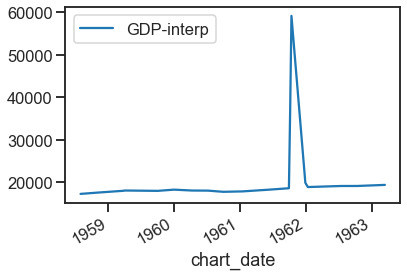

In [44]:
df.plot(y='GDP-interp')

In [45]:
df.drop(columns=['DATE','GDP'],inplace=True)

In [46]:
df.dropna(inplace=True)

In [47]:
df['date_gdp'] = df.index
df.columns

Index(['chart_position', 'song', 'performer', 'song_id', 'instance',
       'time_on_chart', 'consecutive_weeks', 'previous_week', 'peak_position',
       'worst_position', 'chart_debut', 'chart_url', 'lyrics', 'sentiment',
       'GDP-interp', 'date_gdp'],
      dtype='object')

In [48]:
df.reset_index()

,chart_date,chart_position,song,performer,song_id,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,chart_debut,chart_url,lyrics,sentiment,GDP-interp,date_gdp
0,1958-08-02,60.0,Over-And-Over,Bobby-Day,Over And OverBobby Day,1.0,1.0,0.0,0.0,60.0,60.0,1958-08-02,https://www.billboard.com/charts/hot-100/1958-...,"Ah-mmm, ah-mmm, ah-mmm, ah-mmm\n\nWell, I went...",587.0,17277.304348,1958-08-02
1,1958-08-02,58.0,Fool's-Paradise,The-Crickets,Fool's ParadiseThe Crickets,1.0,1.0,0.0,0.0,58.0,58.0,1958-08-02,https://www.billboard.com/charts/hot-100/1958-...,You took me up to heaven\nWhen you took me in ...,585.0,17277.304348,1958-08-02
2,1958-08-02,13.0,Left-Right-Out-Of-Your-Heart-(Hi-Lee-Hi-Lo-Hi-...,Patti-Page,Left Right Out Of Your Heart (Hi Lee Hi Lo Hi ...,1.0,1.0,0.0,0.0,13.0,13.0,1958-08-02,https://www.billboard.com/charts/hot-100/1958-...,Hi-lee hi-lo hi-lup up - up\nhi-lee hi-lo hi-l...,580.0,17277.304348,1958-08-02
3,1958-08-02,97.0,I-Believe-In-You,Robert-&-Johnny,I Believe In YouRobert & Johnny,1.0,1.0,0.0,0.0,97.0,97.0,1958-08-02,https://www.billboard.com/charts/hot-100/1958-...,Oo woah woah oo woah woah\nOo woah woah oo woa...,578.0,17277.304348,1958-08-02
4,1958-08-02,35.0,Rock-in-Robin,Bobby-Day,Rock-in RobinBobby Day,1.0,1.0,0.0,0.0,35.0,35.0,1958-08-02,https://www.billboard.com/charts/hot-100/1958-...,"(Tweedle-lee-dee-dee-dee, tweedle-lee-dee-dee ...",576.0,17277.304348,1958-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,1963-03-16,58.0,Young Lovers,Paul and Paula,Young LoversPaul and Paula,1.0,1.0,0.0,0.0,58.0,58.0,1963-03-16,https://www.billboard.com/charts/hot-100/1963-...,We pledged our love to each other\nWe know tha...,2029.0,19394.800000,1963-03-16
1961,1963-03-16,74.0,I Got What I Wanted,Brook Benton,I Got What I WantedBrook Benton,1.0,1.0,0.0,0.0,74.0,74.0,1963-03-16,https://www.billboard.com/charts/hot-100/1963-...,When I go to all the places we used to go\nWhe...,2025.0,19394.800000,1963-03-16
1962,1963-03-16,61.0,Puff-(The-Magic-Dragon),"Peter,-Paul-&-Mary","Puff (The Magic Dragon)Peter, Paul & Mary",1.0,1.0,0.0,0.0,61.0,61.0,1963-03-16,https://www.billboard.com/charts/hot-100/1963-...,Puff the magic dragon lived by the sea\nAnd fr...,2994.0,19394.800000,1963-03-16
1963,1963-03-16,90.0,Days-Of-Wine-And-Roses,Andy-Williams,Days Of Wine And RosesAndy Williams,1.0,1.0,0.0,0.0,90.0,90.0,1963-03-16,https://www.billboard.com/charts/hot-100/1963-...,The days of wine and roses\nLaugh and run away...,2995.0,19394.800000,1963-03-16


''

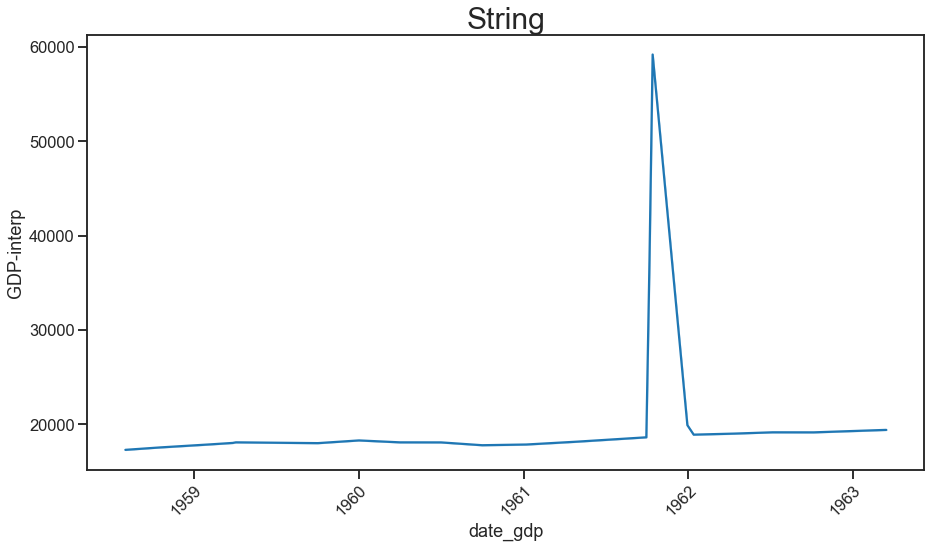

In [49]:
data = df.reset_index()
x = 'date_gdp'
y = 'GDP-interp'
title_size = 30
label_size = 15


sns.set_context("talk")
fig, ax=plt.subplots(figsize=(15,8))
sns.set_style("ticks")
p = sns.lineplot(ax=ax, data=data, x=x, y=y)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')

# p.set_xlabel('String',fontsize=label_size)
# p.set_ylabel('String',fontsize=label_size)
p.set_title('String',fontsize=title_size)
;